In [2]:
import pandas as pd, matplotlib.pyplot as plt, pylab as pl, seaborn as sbs
libPath = 'project1/scripts'
import sys
if not libPath in sys.path: sys.path.append(libPath)
from implementations import *
# Use a subset 
df = pd.read_csv("clean_train_data.csv")[0:200]
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,0.257671,0.532835,0.474611,-1.093454,-0.870648,-0.632428,0.987313,1.378045,...,-0.156564,-0.542982,-0.660444,-0.578666,1.234399,0.251795,-0.367844,0.612965,-1.359329,-0.645152
1,100005,-1,-0.544388,-0.706350,-0.475044,0.064383,0.115251,-0.233525,0.094923,-0.819132,...,1.229416,-0.370559,1.514133,-0.239608,-1.377788,-0.354529,-0.054320,0.115912,1.711823,0.094961
2,100006,1,0.426952,-0.208400,0.719034,-0.069451,-0.971751,-0.548472,0.276686,1.219260,...,-0.799385,-0.290304,-0.660444,0.236631,0.498040,0.807823,-0.032535,0.070414,-1.520013,-0.032292
3,100011,-1,-0.132873,-0.812497,-0.068375,-1.056294,0.073553,-0.313332,-0.144736,1.150840,...,1.180350,-0.315521,1.514133,-0.441676,-0.449036,0.173863,-0.032256,0.873721,-1.141415,-0.163737
4,100023,1,0.307234,-1.123065,0.812311,0.820835,-0.273740,-0.034514,-0.011685,-0.853987,...,-0.540272,0.858731,-0.660444,1.300559,0.665238,0.789031,0.762212,-0.384076,-1.529918,0.873721


In [3]:
col_labels = df.columns.tolist()
N_FEATURES = len(col_labels) - 2
N_DATA = len(df)
N_DATA

200

In [30]:
y = np.array(df[col_labels[1]])
loss_vec = np.zeros(N_FEATURES)
loss_te_vec = np.zeros(N_FEATURES)
w_vec = np.zeros([N_FEATURES, 2])



for i in np.arange(N_FEATURES):
    x = np.array(df[col_labels[i + 2]])
    
    x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
    tx_tr = build_poly(x_tr, 1)
    tx_te = build_poly(x_te, 1)
    
    w_vec[i], loss_vec[i] = least_squares(y_tr, tx_tr)
    
    y_test = tx_te @ w_vec[i]
    y_test[y_test >= 0] = 1
    y_test[y_test < 0] = -1
    loss_te_vec[i] = (y_te - y_test) @ (y_te - y_test) 

In [31]:
loss_te_vec

array([72., 64., 80., 72., 64., 68., 60., 64., 56., 80., 60., 64., 48.,
       68., 68., 56., 64., 68., 64., 68., 64., 68., 52., 80., 80., 72.,
       64., 68., 64., 80.])

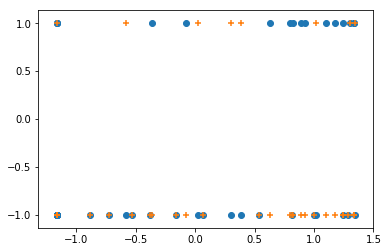

In [32]:
x = np.array(df[col_labels[np.argmin(loss_te_vec) + 2]])

tx_tr = build_poly(x_tr, 1)
tx_te = build_poly(x_te, 1)
x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)

y_test = tx_te @ w_vec[np.argmin(loss_te_vec) ]
y_test[y_test >= 0] = 1
y_test[y_test < 0] = -1

plt.scatter(x_te,y_te)
plt.scatter(x_te,y_test, marker='+')

In [33]:
w_vec[np.argmin(loss_te_vec)]

array([-0.08857582,  0.20305   ])

In [85]:
queue = np.delete(np.arange(N_FEATURES), 12)
x0 = np.array(df[col_labels[12 + 2]])[:,np.newaxis]
lossls0=loss_te_vec[12]

w_vec = []
loss_tr_vec = []
loss_t_vec = []

for i in queue: 
    x=np.concatenate((x0, np.array(df[col_labels[2+i]])[:,np.newaxis]), axis=1)
    
    x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
    tx_tr = build_poly(x_tr, 1)
    tx_te = build_poly(x_te, 1)
    wls, lossls = least_squares(y_tr, tx_tr)
    w_vec.append(wls)
    loss_tr_vec.append(lossls)
    
    y_test = tx_te @ wls
    y_test[y_test >= 0] = 1
    y_test[y_test < 0] = -1
    loss_t_vec.append((y_te - y_test) @ (y_te - y_test))
    if (np.abs(lossls - lossls0)>np.abs(lossls0*0.1)):
        x0 = x
        lossls0 = lossls
        
        

In [91]:
loss_te_vec[12]


48.0

In [95]:
x0 = np.array(df[col_labels[12 + 2]])[:,np.newaxis]

x=np.concatenate((x0, np.array(df[col_labels[5]])[:,np.newaxis]), axis=1)
x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
tx_tr = build_poly(x_tr, 1)
tx_te = build_poly(x_te, 1)
wls, lossls = least_squares(y_tr, tx_tr)
    
y_test = tx_te @ wls
y_test[y_test >= 0] = 1
y_test[y_test < 0] = -1
loss_test=((y_te - y_test) @ (y_te - y_test))
loss_test

64.0

In [10]:
col_labels[2:4]

['DER_mass_MMC', 'DER_mass_transverse_met_lep']

In [92]:
wls

array([-0.08392656,  0.20830835,  0.10264163])

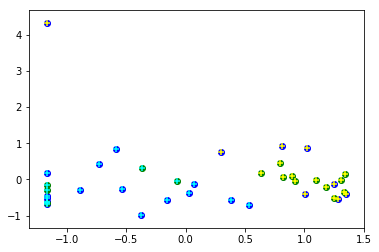

In [90]:
plt.scatter(x_te[y_te<0,0],x_te[y_te<0,1],c='blue')
plt.scatter(x_te[y_te>0,0],x_te[y_te>0,1],c='green')
plt.scatter(x_te[y_test<0,0],x_te[y_test<0,1],c='cyan', marker = '+')
plt.scatter(x_te[y_test>0,0],x_te[y_test>0,1],c='yellow', marker = '+')



In [126]:
collabels=df.columns.tolist()

In [129]:
collabels[4:8]


['DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet']